# knn_cf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [2]:
books = pd.read_csv(r'D:\DEBI_DATA_SCIENCE\recommend_system_project\books_cleaned.csv')
ratings = pd.read_csv(r'D:\DEBI_DATA_SCIENCE\recommend_system_project\ratings_cleaned.csv')
users = pd.read_csv(r'D:\DEBI_DATA_SCIENCE\recommend_system_project\users_cleaned.csv')


# **processing**

# book_df

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 3040 non-null   object
 1   Book-Title           3040 non-null   object
 2   Book-Author          3040 non-null   object
 3   Year-Of-Publication  3040 non-null   int64 
 4   Publisher            3040 non-null   object
 5   Image-URL-S          3040 non-null   object
 6   Image-URL-M          3040 non-null   object
 7   Image-URL-L          3040 non-null   object
dtypes: int64(1), object(7)
memory usage: 190.1+ KB


In [5]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [26]:
print(books.isna().sum())
print('duplicated =',books.duplicated().sum())

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64
duplicated = 0


# international Standard Book Number
cheack the validatiion

In [3]:
import re

def is_valid_isbn(isbn):
    rex=r'^\d{10}'
    # return (re.match(rex, isbn))
    return bool(re.match(rex, isbn))

In [6]:
books['ISBN'].apply(is_valid_isbn)[0]

True

In [29]:
# book_df[book_df['ISBN'].apply(is_valid_isbn)]

In [5]:
books=books[books['ISBN'].apply(is_valid_isbn)]

In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
1,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
2,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
3,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...
4,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...


In [6]:
books['ISBN']=books['ISBN'].astype(int)
books['ISBN'].dtype

dtype('int32')

# users_df

In [140]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [141]:
users.isna().sum()/len(users)

User-ID     0.000000
Location    0.000000
Age         0.271771
dtype: float64

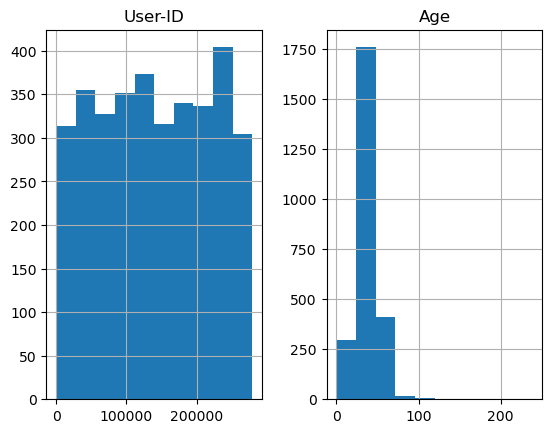

In [101]:
users.hist()
plt.show()

# countnue


In [7]:
users.describe()

,User-ID,Age
count,3422.000000,2492.000000
mean,140270.727352,36.260433
std,79593.848162,13.905051
min,114.000000,0.000000
25%,71802.750000,27.000000
50%,138624.500000,34.000000
75%,209801.750000,43.000000
max,278843.000000,239.000000


In [8]:
users.describe(include='object')

,Location
count,3422
unique,2037
top,"toronto, ontario, canada"
freq,48


# rating_df

In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,277157,0312979517,5.0
1,277157,0345452550,7.0
2,277157,0399146504,7.0
3,277157,0399151451,7.0
4,277157,0425183181,5.0


In [35]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [36]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55976 entries, 0 to 55975
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User-ID      55976 non-null  int64  
 1   ISBN         55976 non-null  object 
 2   Book-Rating  55976 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
ratings=ratings[ratings['ISBN'].apply(is_valid_isbn)]
ratings['ISBN']=ratings['ISBN'].astype(int)

In [38]:
ratings.describe()

,User-ID,ISBN,Book-Rating
count,51439.000000,5.143900e+04,51439.000000
mean,137151.346682,4.880051e+08,7.883571
std,80837.392991,2.765944e+08,1.750993
min,114.000000,7.154615e+06,1.000000
25%,68555.000000,3.454509e+08,7.000000
50%,135149.000000,4.409980e+08,8.000000
75%,208829.000000,5.535827e+08,9.000000
max,278843.000000,1.931562e+09,10.000000


# code 

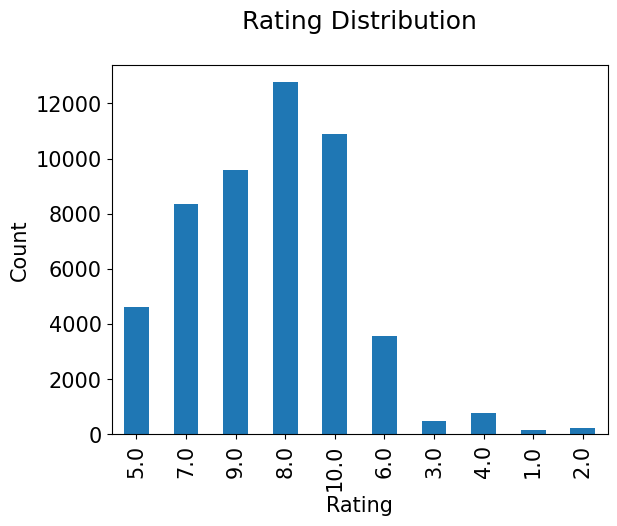

In [ ]:
# Rating distribution
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()




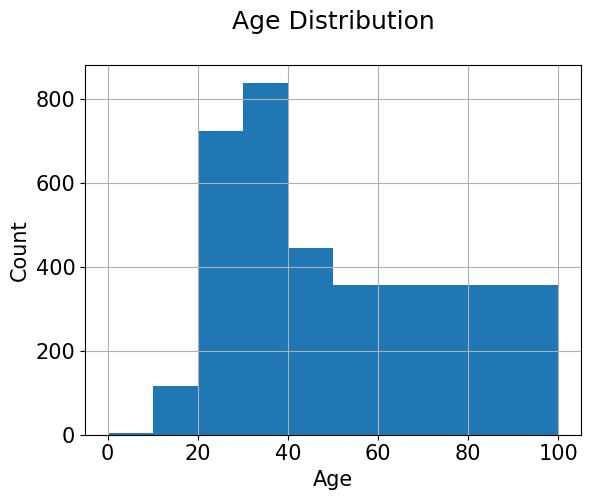

In [40]:
# Age distribution
users['Age'].hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [41]:
pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count().reset_index()).sort_values(by='Book-Rating',ascending=False).tail()


,ISBN,Book-Rating
225,140043519,8
1662,451527097,8
1302,440972329,8
2171,671670646,8
2533,805068015,8


# Merge Ratings with Books

# Train-test split

In [12]:
from sklearn.model_selection import train_test_split

# 1. Start from the original ratings DataFrame
ratings = ratings[ratings['Book-Rating'] > 0]  # Optional but helps filter out implicit feedback (zeros)

# 2. Split into training and testing sets
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# 3. Create the train matrix
train_matrix = ratings.pivot(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)

# 4. Create the test matrix (only positive ratings)
test_data = test_data[test_data['Book-Rating'] > 0]
test_matrix = test_data.pivot(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)


In [13]:
train_matrix.shape

(2791, 3422)

In [14]:
train_matrix.head()

User-ID,114,243,244,254,507,638,805,882,929,1025,...,278137,278188,278194,278202,278390,278418,278535,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
7154615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20198817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20198906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20199600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20427859,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# knn model

# csr_matrix
This creates a Compressed Sparse Row (CSR) matrix:

Only stores non-zero values (i.e., actual ratings).

Speeds up distance/similarity calculations (like cosine similarity in kNN).

Great for recommender systems with large, sparse datasets.


In [24]:
matrix = csr_matrix(train_matrix.values)

 # k-Nearest Neighbors (kNN) for item-based collaborative filtering
 Find books that are similar to a given book based on how users have rated them.

Recommend books based on similarity of rating patterns
# metric='cosine':
Measures cosine similarity between book rating vectors (rows in the matrix).

It focuses on the angle, not the magnitude. So it's good when users rate on different scales.
# algorithm='brute':
Uses brute-force search (compares every book with every other book).

It’s simple and actually faster on sparse data, especially with cosine distance.




In [25]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

# sum tests 

In [47]:
query_index = np.random.choice(train_matrix.shape[0])
print("Query index:", query_index)



Query index: 669


In [48]:
train_matrix[train_matrix.index==553279378].values.reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [49]:
distances, indices = model_knn.kneighbors(train_matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)



In [19]:
# distances
indices

array([[2607, 2613, 2585, 2588, 2609, 2604]], dtype=int64)

In [57]:
indices.flatten()[3]

304

452260116

In [64]:
train_matrix.index[query_index]
print('Recommendations for who love book   = {0}'.format(train_matrix.index[query_index]))
print('#######################')
isbn_book_recom=[]
for i in range(1, len(distances.flatten())):
    print(f"({i}): {train_matrix.index[indices.flatten()[i]]}, with distance: {distances.flatten()[i]:.4f}") 
    isbn_book_recom.append(train_matrix.index[indices.flatten()[i]])
   


Recommendations for who love book   = 374270325
#######################
(1): 393317552, with distance: 0.7002
(2): 140077022, with distance: 0.7160
(3): 440931800, with distance: 0.7226
(4): 670891576, with distance: 0.7307
(5): 451166604, with distance: 0.7411


In [65]:
isbn_book_recom

[393317552, 140077022, 440931800, 670891576, 451166604]

In [60]:
books.loc[books['ISBN'] == 553585118 ,'Book-Title'].values

array(['Once a Thief'], dtype=object)

In [61]:
book_titles = []
for isbn in isbn_book_recom :
    title = books.loc[books['ISBN'] == isbn,'Book-Title'].values
    book_titles.append(title)

In [62]:
book_titles

[array(['Wide Sargasso Sea (Norton Paperback Fiction)'], dtype=object),
 array(['The Life and Loves of a She-Devil'], dtype=object),
 array(["The Samurai's Garden : A Novel"], dtype=object),
 array(['Invisible Man'], dtype=object),
 array(['The Bluest Eye'], dtype=object)]

In [77]:
recomended_books=books[books['ISBN'].isin(isbn_book_recom)]

In [78]:
recomended_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2545,671744216,The Secret,Julie Garwood,1992,Pocket,http://images.amazon.com/images/P/0671744216.0...,http://images.amazon.com/images/P/0671744216.0...,http://images.amazon.com/images/P/0671744216.0...
2587,553293257,Rendezvous,Amanda Quick,1991,Bantam,http://images.amazon.com/images/P/0553293257.0...,http://images.amazon.com/images/P/0553293257.0...,http://images.amazon.com/images/P/0553293257.0...
2621,671744208,Castles,Julie Garwood,1993,Pocket,http://images.amazon.com/images/P/0671744208.0...,http://images.amazon.com/images/P/0671744208.0...,http://images.amazon.com/images/P/0671744208.0...
2668,425168131,Conspiracy in Death,J. D. Robb,2003,Berkley Publishing Group,http://images.amazon.com/images/P/0425168131.0...,http://images.amazon.com/images/P/0425168131.0...,http://images.amazon.com/images/P/0425168131.0...
2797,671737805,Gentle Warrior,Julie Garwood,1990,Pocket,http://images.amazon.com/images/P/0671737805.0...,http://images.amazon.com/images/P/0671737805.0...,http://images.amazon.com/images/P/0671737805.0...


# the get_recommendations

In [27]:
def get_recommendations(rating_matrix=train_matrix,isbn=0,k=6):
    distances, indices = model_knn.kneighbors(rating_matrix[train_matrix.index==isbn].values.reshape(1, -1), n_neighbors=k)
    isbn_book_recom=[]
    for i in range(1, len(distances.flatten())):
        # to get its distance
    #  isbn_book_recom.append([train_matrix.index[indices.flatten()[i]],distances.flatten()[i]])
        isbn_book_recom.append(train_matrix.index[indices.flatten()[i]])
    recomended_books=books[books['ISBN'].isin(isbn_book_recom)]
    return recomended_books

In [51]:
get_recommendations(isbn=553279378)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1235,451191137,Anthem,Ayn Rand,1996,Signet Book,http://images.amazon.com/images/P/0451191137.0...,http://images.amazon.com/images/P/0451191137.0...,http://images.amazon.com/images/P/0451191137.0...
1810,312955006,The Concrete Blonde (A Harry Bosch Novel),Michael Connelly,1995,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312955006.0...,http://images.amazon.com/images/P/0312955006.0...,http://images.amazon.com/images/P/0312955006.0...
1865,671867091,Remember Me,Mary Higgins Clark,1995,Pocket,http://images.amazon.com/images/P/0671867091.0...,http://images.amazon.com/images/P/0671867091.0...,http://images.amazon.com/images/P/0671867091.0...
2372,440224810,Special Delivery: A Novel,Danielle Steel,1998,Dell Publishing Company,http://images.amazon.com/images/P/0440224810.0...,http://images.amazon.com/images/P/0440224810.0...,http://images.amazon.com/images/P/0440224810.0...
2518,515120871,Finding the Dream,Nora Roberts,1997,Jove Books,http://images.amazon.com/images/P/0515120871.0...,http://images.amazon.com/images/P/0515120871.0...,http://images.amazon.com/images/P/0515120871.0...


# **EVALUATION**

# 1- precision

In [ ]:
def precision_at_k(recommended, actual, k=5):
    recommended_at_k = recommended[:k]
    relevant_set = set(actual)
    correct = sum([1 for book in recommended_at_k if book in relevant_set])
    return correct / k

In [52]:
test_data.head()

,User-ID,ISBN,Book-Rating
21142,101876,142001325,10.0
20998,101305,375705856,8.0
54251,268030,385504209,8.0
43176,213760,61057363,7.0
33269,160819,345445848,7.0


In [28]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def get_recommendations(rating_matrix, isbn, model_knn, k=6):
    """
    Finds K nearest books based on KNN collaborative filtering.

    :param rating_matrix: User-item matrix (DataFrame)
    :param isbn: Target book ISBN
    :param model_knn: Trained KNN model
    :param k: Number of nearest books to return
    :return: List of recommended ISBNs
    """
    # Find nearest neighbors
    distances, indices = model_knn.kneighbors(rating_matrix.loc[isbn].values.reshape(1, -1), n_neighbors=k)

    # Extract recommended books
    isbn_book_recom = [rating_matrix.index[i] for i in indices.flatten()[1:]]  # Exclude first (self)

    return isbn_book_recom


# ## 1- precision


In [29]:
def precision_at_k(recommended, actual, k=5):
    recommended_at_k = recommended[:k]
    relevant_set = set(actual)
    correct = sum(1 for book in recommended_at_k if book in relevant_set)
    return correct / k


# ## 2- Recall

In [31]:
def recall_at_k(recommended, actual, k=5):
    recommended_at_k = recommended[:k]
    relevant_items = set(actual)
    retrieved_relevant = len([book for book in recommended_at_k if book in relevant_items])
    return retrieved_relevant / len(relevant_items) if relevant_items else 0


In [34]:
user_id = 153662
liked_books = ratings[
    (ratings['User-ID'] == user_id) &
    (ratings['Book-Rating'] >= 7)
]['ISBN'].tolist()

input_isbn = liked_books[0]
recommended_books = get_recommendations(train_matrix, input_isbn, model_knn, k=10)
actual_books = liked_books[1:]

# Compute evaluation metrics
precision = precision_at_k(recommended_books, actual_books, k=7)
recall = recall_at_k(recommended_books, actual_books, k=7)

In [35]:
print(f"Precision = {precision:.2f}")
print(f"Recall = {recall:.2f}")

Precision = 0.86
Recall = 0.03
